In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
from sklearn.metrics import mean_squared_error,r2_score
import warnings
#忽略警告输出
warnings.filterwarnings("ignore")
#用来正常显示中文标签
plt.rcParams["font.sans-serif"]=["SimHei"]
#用来显示负号
plt.rcParams["axes.unicode_minus"]=False
#在jupyter中显示figure
%matplotlib inline

In [2]:
#导入数据
excel_file_name = 'Carbon_Dioxide_Emissions_From_Energy_Consumption-_Electric_Power_Sector.xlsx'
data= pd.read_excel(excel_file_name , index_col='Month')#读取

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


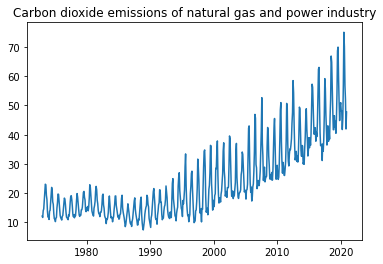

In [3]:
plt.plot(data['Natural Gas Electric Power Sector CO2 Emissions'])
plt.title('Carbon dioxide emissions of natural gas and power industry')
plt.show()

In [4]:
#查看数据变量属性
data.info()
#展示前三个数据
data.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 1973-01-01 to 2020-12-01
Data columns (total 9 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Coal Electric Power Sector CO2 Emissions                                                    576 non-null    float64
 1   Natural Gas Electric Power Sector CO2 Emissions                                             576 non-null    float64
 2   Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  576 non-null    float64
 3   Petroleum Coke Electric Power Sector CO2 Emissions                                          576 non-null    float64
 4   Residual Fuel Oil Electric Power Sector CO2 Emissions                                       576 non-null    float64
 5   Petroleum Electric Power 

,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
Month,,,,,,,,,
1973-01-01,72.076,12.175,2.375,0.128,24.867,27.369,Not Available,Not Available,111.621
1973-02-01,64.442,11.708,2.061,0.106,20.867,23.034,Not Available,Not Available,99.185
1973-03-01,64.084,13.994,1.171,0.083,19.780,21.034,Not Available,Not Available,99.112


In [5]:
data.tail(3)

,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
Month,,,,,,,,,
2020-10-01,61.385,52.159,0.292,0.374,0.396,1.062,0.035,0.904,115.546
2020-11-01,62.245,41.947,0.267,0.604,0.341,1.212,0.034,0.875,106.314
2020-12-01,78.821,47.734,0.319,0.802,0.365,1.486,0.035,0.904,128.981


In [6]:
#利用key_list 分割data
key_list=["Geothermal Energy Electric Power Sector CO2 Emissions","Non-Biomass Waste Electric Power Sector CO2 Emissions"]
data1=data[data.keys().drop(key_list)]
data1.head(3)

,Coal Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Petroleum Coke Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
Month,,,,,,,
1973-01-01,72.076,12.175,2.375,0.128,24.867,27.369,111.621
1973-02-01,64.442,11.708,2.061,0.106,20.867,23.034,99.185
1973-03-01,64.084,13.994,1.171,0.083,19.780,21.034,99.112


In [7]:
#data2为有缺失的两个属性
data2=data[key_list]
#data2删除值为Not Available的行
data2=data2.drop(data2[data2.values=="Not Available"].index)
#之前是object,转为float
# data2['Geothermal Energy Electric Power Sector CO2 Emissions']=data2['Geothermal Energy Electric Power Sector CO2 Emissions'].astype('float64')
# data2['Non-Biomass Waste Electric Power Sector CO2 Emissions']=data2['Non-Biomass Waste Electric Power Sector CO2 Emissions'].astype('float64')
data2 = data2.astype(np.float64)
data2.head(3)

,Geothermal Energy Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions
Month,,
1989-01-01,0.031,0.371
1989-02-01,0.028,0.335
1989-03-01,0.031,0.371


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


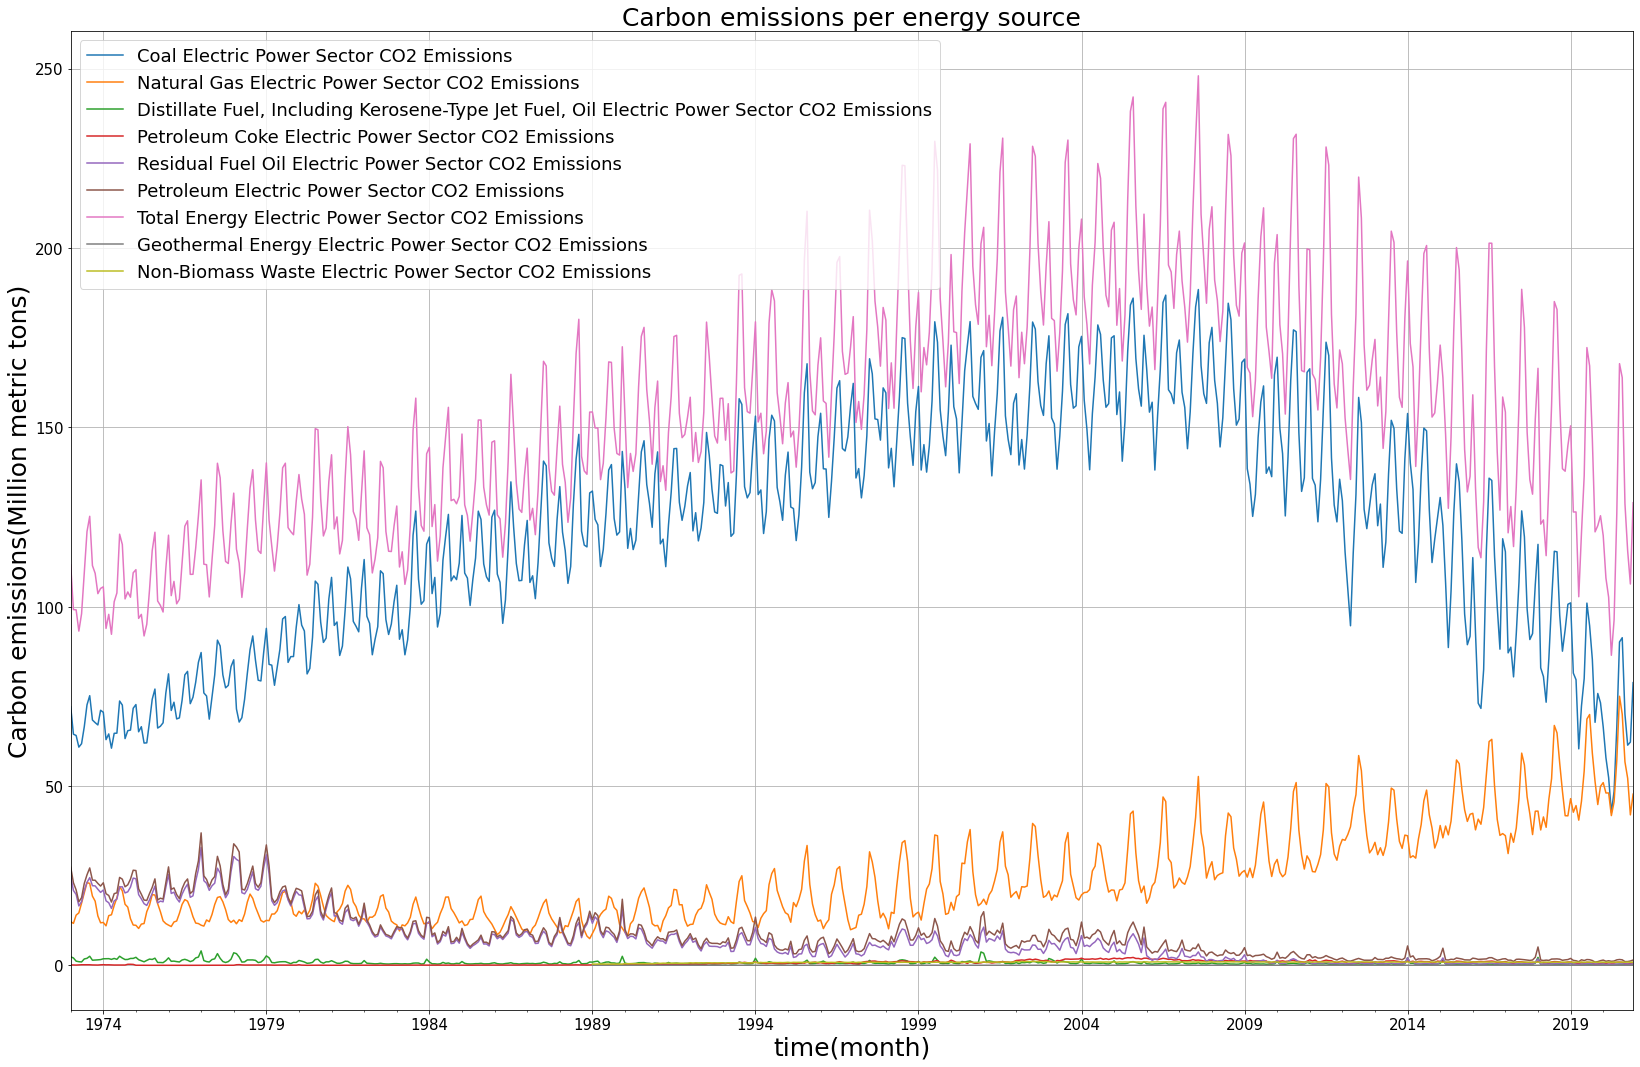

In [8]:
#每种能源的二氧化碳排放量大图
keys1=data1.keys()
fig,ax=plt.subplots(figsize=(28,18))

#ax.plot(data1)
#ax.plot(data2)
data1.plot(ax=ax,fontsize=15)
data2.plot(ax=ax,fontsize=15)

#设置子图
ax.set_title("Carbon emissions per energy source",fontsize=25)
ax.set_xlabel("time(month)",fontsize=25)
ax.set_ylabel("Carbon emissions(Million metric tons)",fontsize=25)
ax.legend(loc="best",fontsize=18)
ax.grid()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


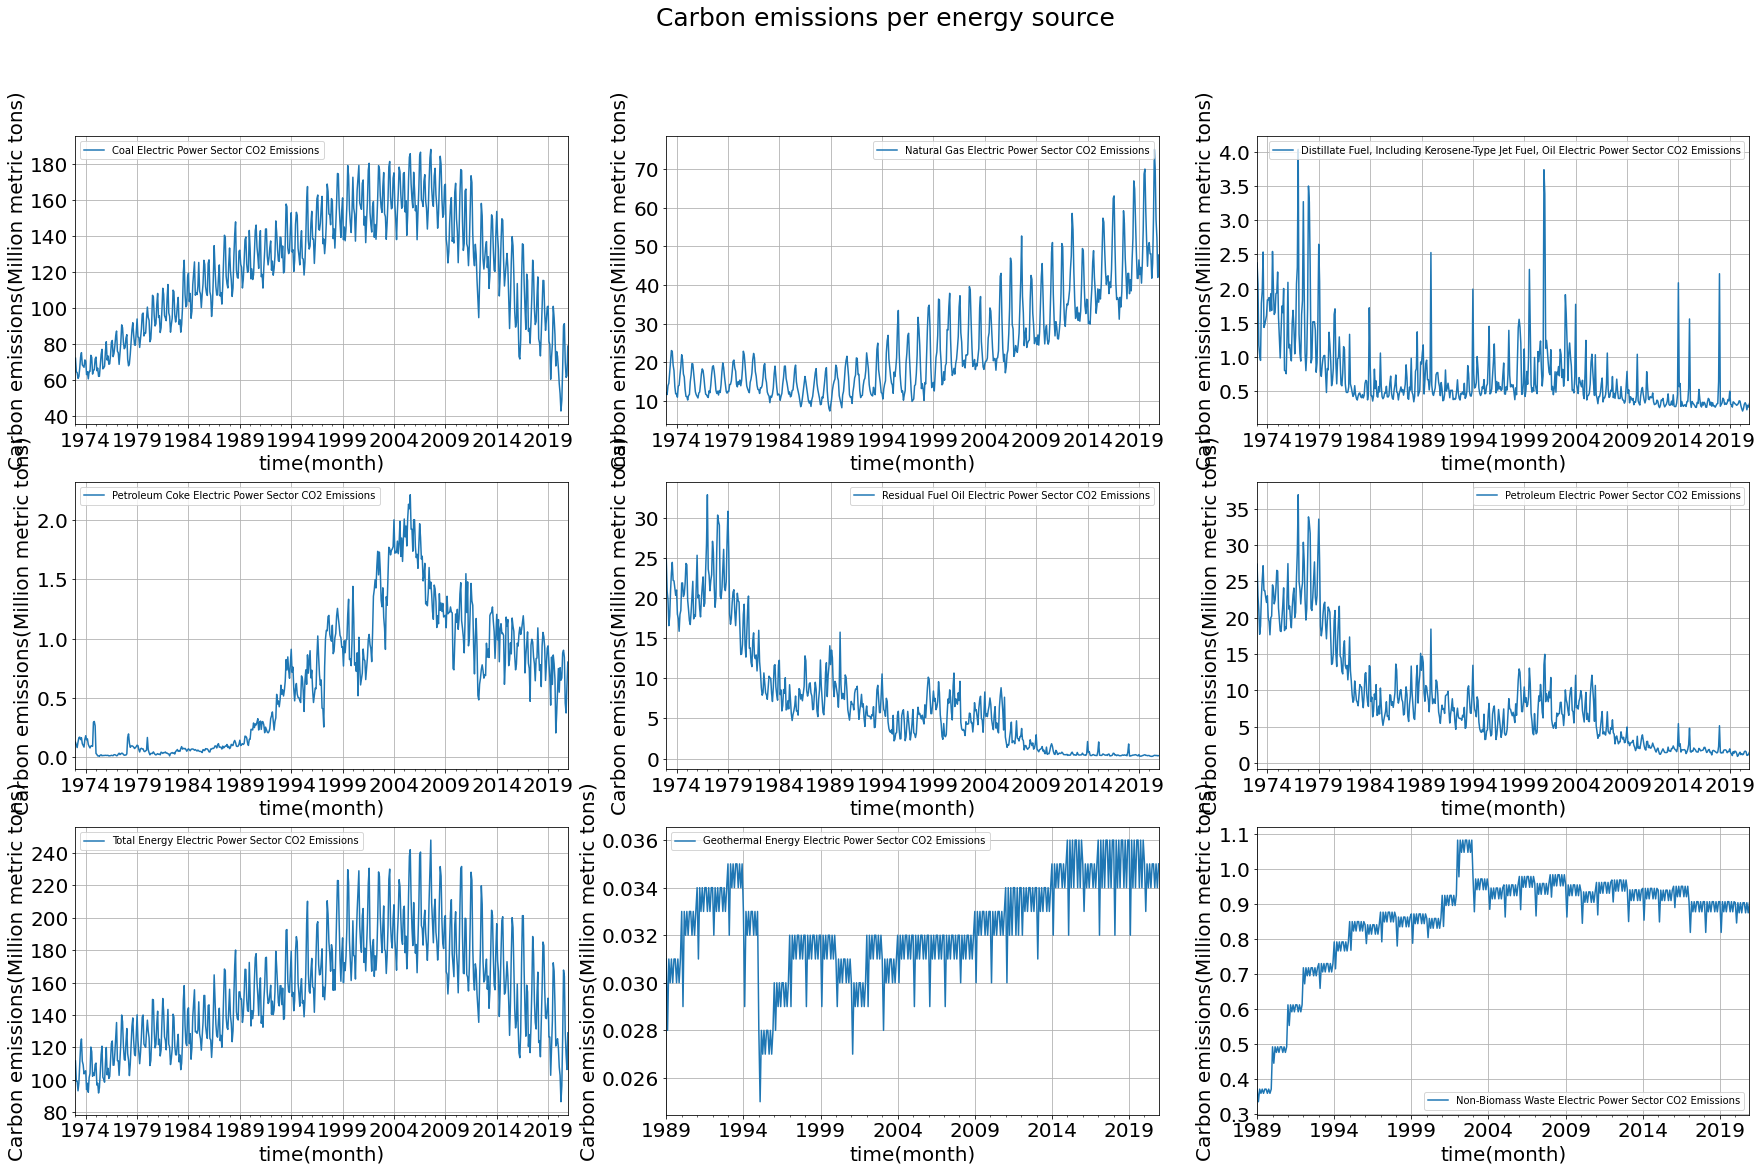

In [9]:
#每种能源的二氧化碳排放量子图

#生成3*3子图
fig,ax=plt.subplots(3,3,figsize=(30,18))
axes=ax.flatten()

fig.suptitle("Carbon emissions per energy source",fontsize=25)

#画前7个
keys1=data1.keys()
for key_index in range(len(keys1)):
    key=keys1[key_index]
    #axes[key_index].plot(data[key],label=key)
    data[key].plot(ax=axes[key_index],fontsize=20)
    
#画最后2个
keys2=data2.keys()
for key_index in range(len(keys2)):
    key=keys2[key_index]
    axes_index=key_index+7
    data2[key].plot(ax=axes[axes_index],fontsize=20)
    
#设置子图
for index in axes:
    index.set_xlabel("time(month)",fontsize=20)
    index.set_ylabel("Carbon emissions(Million metric tons)",fontsize=20)
    index.legend(loc="best")
    index.grid()

In [10]:
#求和排序
co2=data2["1989-01-01":].sum()
co2=co2.append(data1.loc["1989-01-01":].sum())
co2=co2.sort_values()
print(co2)

Geothermal Energy Electric Power Sector CO2 Emissions                                            12.417
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      224.773
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           328.774
Petroleum Coke Electric Power Sector CO2 Emissions                                              366.577
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          1390.720
Petroleum Electric Power Sector CO2 Emissions                                                  1982.074
Natural Gas Electric Power Sector CO2 Emissions                                               11083.977
Coal Electric Power Sector CO2 Emissions                                                      52428.046
Total Energy Electric Power Sector CO2 Emissions                                              65835.286
dtype: float64


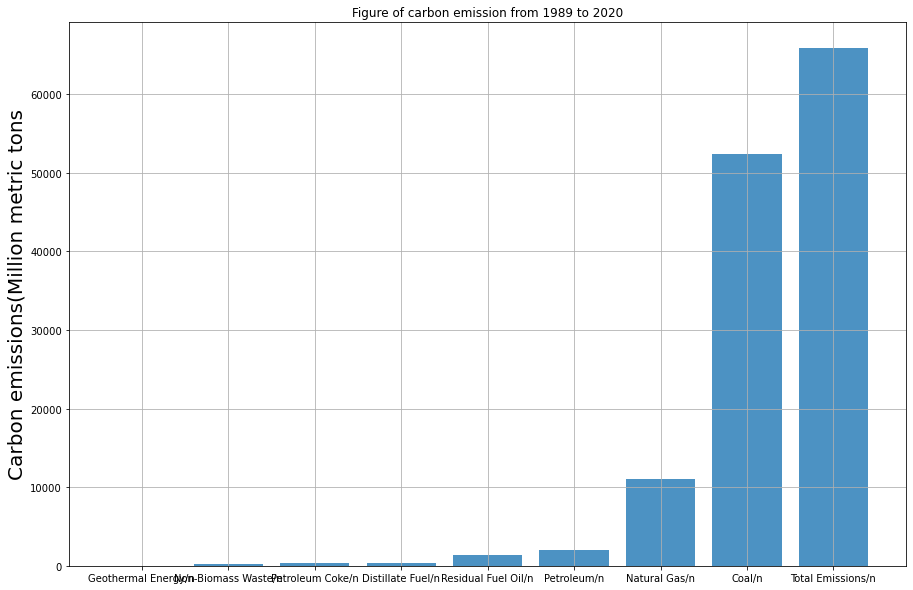

In [11]:
#每种能源的二氧化碳排放量柱状图
cols=["Geothermal Energy/n","Non-Biomass Waste/n","Petroleum Coke/n","Distillate Fuel/n","Residual Fuel Oil/n","Petroleum/n","Natural Gas/n","Coal/n","Total Emissions/n"]
fig,ax=plt.subplots(figsize=(15,10))
bar=ax.bar(cols,co2,align="center",alpha=0.8)
ax.set_ylabel("Carbon emissions(Million metric tons",fontsize=20)
ax.set_title("Figure of carbon emission from 1989 to 2020")
ax.grid()

In [12]:
#使用天然气co2排放量
NGE=data1["Natural Gas Electric Power Sector CO2 Emissions"]
NGE.head()

Month
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

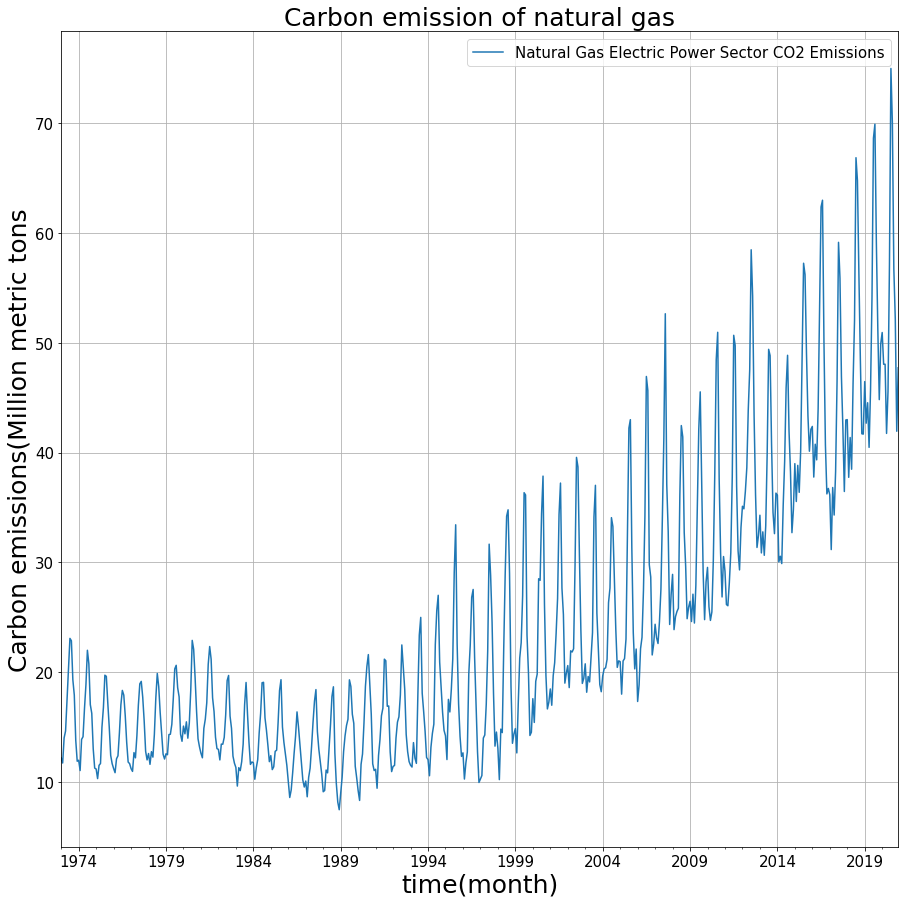

In [13]:
#天然气co2排放量折线图
fig,ax=plt.subplots(figsize=(15,15))
NGE.plot(ax=ax,fontsize=15)
ax.set_title("Carbon emission of natural gas",fontsize=25)
ax.set_xlabel("time(month)",fontsize=25)
ax.set_ylabel("Carbon emissions(Million metric tons",fontsize=25)
ax.legend(loc="best",fontsize=15)
ax.grid()

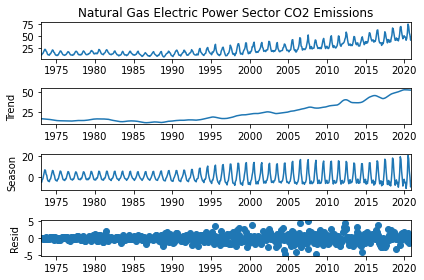

In [14]:
decomposition=tsa.STL(NGE).fit()
decomposition.plot()
#趋势效应
trend=decomposition.trend
#季节效应
seasonal=decomposition.seasonal
#随机效应
residual=decomposition.resid

In [15]:
#利用ADF检查平稳性
def test_stationarity(timeseries,alpha=1e-3):
    datatest=tsa.adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(datatest[0:4],index=["Test Statistic","p-value","#Lags used","Number of Observations Used"])
    for key,value in datatest[4].items():
        dfoutput["Critical Value(%s)"%key]=value
        
        print(dfoutput)
        critical_value=datatest[4]["5%"]
        test_statistic=datatest[0]
        pvalue=datatest[1]
        if pvalue<alpha and test_statistic<critical_value:#null hypothesis:x is non stationary
            print("X is stationary")
            return True
        else:
            print("X is not stationary")
            return False

In [16]:
test_stationarity(NGE)

Test Statistic                   1.199387
p-value                          0.995982
#Lags used                      15.000000
Number of Observations Used    560.000000
Critical Value(1%)              -3.442081
dtype: float64
X is not stationary


False

In [17]:
#平稳化操作
#一阶差分
nge_difference=NGE.diff(1)
#12步差分
nge_seasonal=nge_difference.diff(12)
test_stationarity(nge_seasonal.dropna())

Test Statistic                -9.874391e+00
p-value                        3.917473e-17
#Lags used                     1.200000e+01
Number of Observations Used    5.500000e+02
Critical Value(1%)            -3.442296e+00
dtype: float64
X is stationary


True

In [18]:
#白噪声检验
def test_white_noise(data):
    return sm.stats.acorr_ljungbox(data.dropna(),return_df=True)

In [19]:
test_white_noise(NGE)

,lb_stat,lb_pvalue
1,510.761759,4.329901e-113
2,918.293107,3.937182e-200
3,1236.649128,8.193469e-268
4,1503.389860,0.000000e+00
5,1746.938516,0.000000e+00
6,1976.988610,0.000000e+00
7,2208.912086,0.000000e+00
8,2454.086461,0.000000e+00
9,2740.822623,0.000000e+00
10,3101.855589,0.000000e+00


<function matplotlib.pyplot.show(close=None, block=None)>

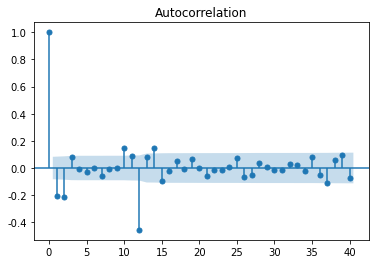

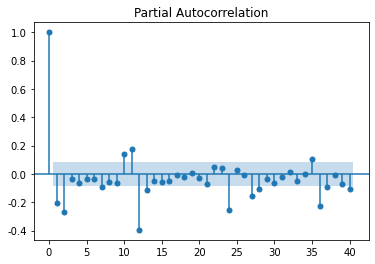

In [20]:
fig=plot_acf(nge_seasonal.dropna(),lags=40)
fig=plot_pacf(nge_seasonal.dropna(),lags=40)
plt.show

In [28]:
#网格搜索pdq、PDQ
def grid_search(data):
    p=q=range(0,3)
    s=[12]
    d=[1]
    PDQs=list(itertools.product(p,d,q,s))
    pdq=list(itertools.product(p,d,q))
    params=[]
    seasonal_params=[]
    results=[]
    grid=pd.DataFrame()
    
    for param in pdq:
        for seasonal_param in PDQs:
            mod=tsa.SARIMAX(data,order=param,seasonal_order=seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
            result=mod.fit()
            print("ARIMA{}X{}-AIC:{}".format(param,seasonal_param,result.aic))
            params.append(param)
            seasonal_params.append(seasonal_param)
            results.append(result.aic)
            
    grid["pdq"]=params
    grid["PDQs"]=seasonal_params
    grid["aic"]=results
    print(grid[grid["aic"]==grid["aic"].min()])

In [29]:
grid_search(NGE)

ARIMA(0, 1, 0)X(0, 1, 0, 12)-AIC:2597.414372183535
ARIMA(0, 1, 0)X(0, 1, 1, 12)-AIC:2335.745479131162
ARIMA(0, 1, 0)X(0, 1, 2, 12)-AIC:2296.2887617687684
ARIMA(0, 1, 0)X(1, 1, 0, 12)-AIC:2424.9482032581436
ARIMA(0, 1, 0)X(1, 1, 1, 12)-AIC:2341.256524189812
ARIMA(0, 1, 0)X(1, 1, 2, 12)-AIC:2297.738655653525
ARIMA(0, 1, 0)X(2, 1, 0, 12)-AIC:2342.1329413258945
ARIMA(0, 1, 0)X(2, 1, 1, 12)-AIC:2303.9284315194363
ARIMA(0, 1, 0)X(2, 1, 2, 12)-AIC:2299.73829032488
ARIMA(0, 1, 1)X(0, 1, 0, 12)-AIC:2550.789870535583
ARIMA(0, 1, 1)X(0, 1, 1, 12)-AIC:2306.585683523711
ARIMA(0, 1, 1)X(0, 1, 2, 12)-AIC:2267.7111264334803
ARIMA(0, 1, 1)X(1, 1, 0, 12)-AIC:2386.265478436805
ARIMA(0, 1, 1)X(1, 1, 1, 12)-AIC:2311.064874542986
ARIMA(0, 1, 1)X(1, 1, 2, 12)-AIC:2269.270930859221
ARIMA(0, 1, 1)X(2, 1, 0, 12)-AIC:2310.025984939293
ARIMA(0, 1, 1)X(2, 1, 1, 12)-AIC:2278.5902872842084
ARIMA(0, 1, 1)X(2, 1, 2, 12)-AIC:2271.2706119540594
ARIMA(0, 1, 2)X(0, 1, 0, 12)-AIC:2525.064642793078
ARIMA(0, 1, 2)X(0, 1, 1, 

In [30]:
#建立模型
mod=tsa.SARIMAX(NGE,order=(1,1,2),seasonal_order=(0,1,2,12))
results=mod.fit()

In [31]:
test_white_noise(results.resid)

,lb_stat,lb_pvalue
1,0.183408,0.668461
2,0.235487,0.888924
3,1.269124,0.736478
4,1.395868,0.844913
5,1.397725,0.924562
6,1.414412,0.964976
7,2.795132,0.903285
8,4.053654,0.852250
9,4.656226,0.863188
10,7.237346,0.702864


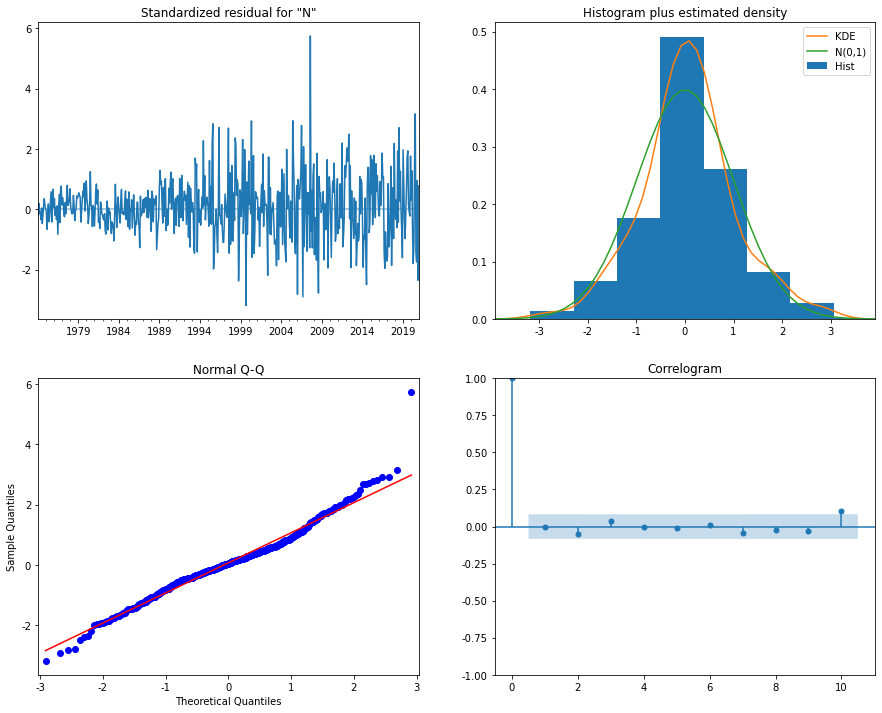

In [34]:
fig_result=results.plot_diagnostics(figsize=(15,12))

In [36]:
#预测
def get_prediction(data,results,start,dynamic=False):
    pred=results.get_prediction(start=start,dynamic=dynamic,full_results=True)
    pred_ci=pred.conf_int()
    forecast=pred.predicted_mean
    truth=data[start:]
    pred_concat=pd.concat([truth,forecast,pred_ci],axis=1)
    pred_concat.columns=["Original value","Estimate","lower limit","upper limit"]
    print("MSE:{}".format(mean_squared_error(truth,forecast)))
    print("RMSE:{}".format(np.sqrt(mean_squared_error(truth,forecast))))
    return pred_concat

MSE:5.458383028115197
RMSE:2.336318263446827


<AxesSubplot:>

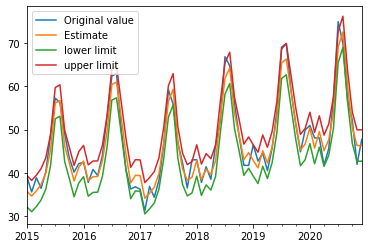

In [37]:
pred=get_prediction(NGE,results,"2015-01-01")
pred.plot()

MSE:15.400505775731622
RMSE:3.924347815335896


<AxesSubplot:>

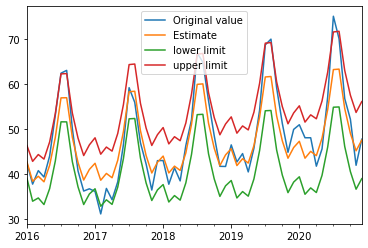

In [38]:
pred=get_prediction(NGE,results,"2016-01-01",dynamic=True)
pred.plot()

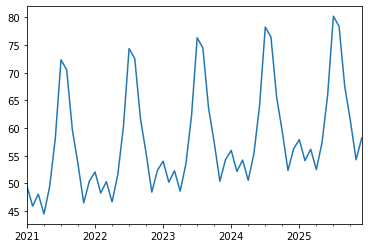

In [39]:
forecast=results.get_forecast(steps=60)
fig=forecast.predicted_mean.plot()

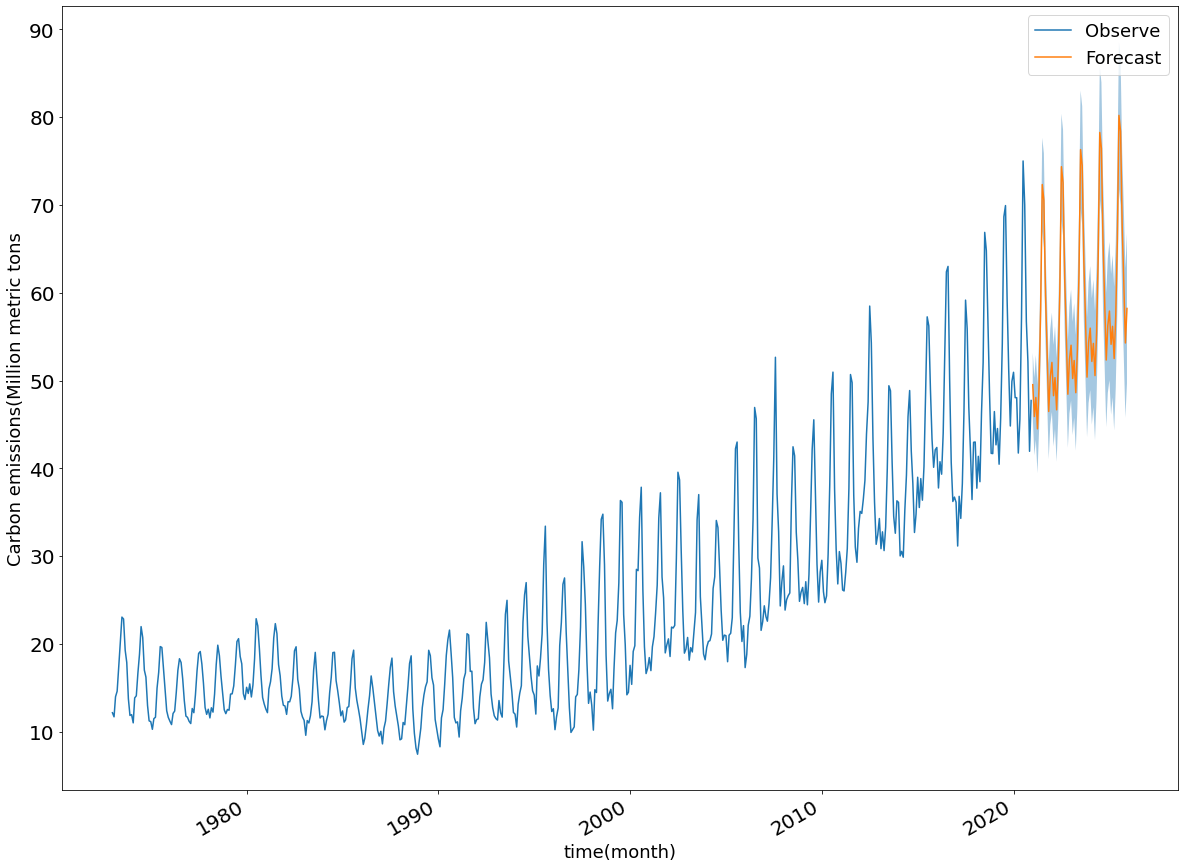

In [41]:
#展示最终预测
fig,ax=plt.subplots(figsize=(20,16))
ax.plot(NGE,label="Observe")
forecast.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(forecast.conf_int().index,forecast.conf_int().iloc[:,0],forecast.conf_int().iloc[:,1],alpha=0.4)
ax.set_xlabel("time(month)",fontsize=18)
ax.set_ylabel("Carbon emissions(Million metric tons",fontsize=18)
ax.legend(loc="best",fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()